# a) Read the Chapter-3 *Hands-on ML*

# b) Read details about Classifiers


*   KNN
*   Logistic Regression

*   LDA
*   QDA







In [1]:
import pandas as pd
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits

In [2]:
hand_digits = load_digits()

# c) Explain the data

From the code given in the below section, we have total 5 elements in the dataset. They are data. target, target names, images and description. 

The data is our pre-processed input data whereas the target is the class label for each data input. There are total 1797 different images and lables. The data is already pre-processed in the dataset so we do not need to carry out the pre-processing separately. However, if you need to do it from scratch then you can use "images" for it. 
Taget names gives the names of the class/label.

The matplotlib display shows the second image in the dataset. We even displayed a few more numbers from the dataset. We even check the distribution of each label throughout the dataset. We can note that the dataset is nearly balanced ie. we have equal numbers of data points for each label. 

In [3]:
hand_digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
print(hand_digits.data.shape)

(1797, 64)


In [5]:
print(hand_digits.target.shape)

(1797,)


<function matplotlib.pyplot.show>

<Figure size 432x288 with 0 Axes>

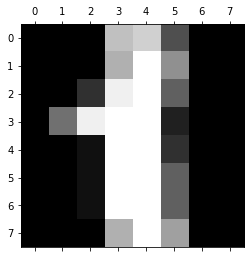

In [6]:
%matplotlib inline
plt.gray()
plt.matshow(hand_digits.images[1])
plt.show

In [7]:
for i in range (0,10):
  print("--- image in the dataset ---", i)
  #print("Data: ", hand_digits.data[i])
  print("Target: ", hand_digits.target[i])
  print("Target_names: ", hand_digits.target_names[i])
  #print("Images: ", hand_digits.images[i])
  print("DESCR", hand_digits.DESCR[i])
  print("\n \n")

--- image in the dataset --- 0
Target:  0
Target_names:  0
DESCR .

 

--- image in the dataset --- 1
Target:  1
Target_names:  1
DESCR .

 

--- image in the dataset --- 2
Target:  2
Target_names:  2
DESCR  

 

--- image in the dataset --- 3
Target:  3
Target_names:  3
DESCR _

 

--- image in the dataset --- 4
Target:  4
Target_names:  4
DESCR d

 

--- image in the dataset --- 5
Target:  5
Target_names:  5
DESCR i

 

--- image in the dataset --- 6
Target:  6
Target_names:  6
DESCR g

 

--- image in the dataset --- 7
Target:  7
Target_names:  7
DESCR i

 

--- image in the dataset --- 8
Target:  8
Target_names:  8
DESCR t

 

--- image in the dataset --- 9
Target:  9
Target_names:  9
DESCR s

 



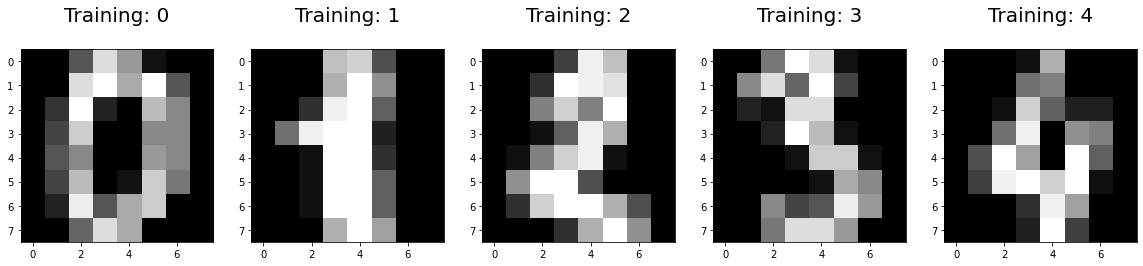

In [8]:
# Credits: towardsdatascience.com
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(hand_digits.data[0:5], hand_digits.target[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize = 20)
  

In [9]:
X = hand_digits['data']
y = hand_digits['target']

In [10]:
y = y.astype(np.uint8)

In [11]:
X_train, X_test, y_train, y_test = X[:1618], X[1618:], y[:1618], y[1618:]

In [12]:
print(X_train.shape)
print(y_train.shape)

(1618, 64)
(1618,)


In [13]:
print(X_test.shape)
print(y_test.shape)

(179, 64)
(179,)


In [14]:
digit_train, counts_train = np.unique(y, return_counts = True)

distribution_train = dict(zip(digit_train, counts_train)) #to check the numbler of datapoints for each digit in y train
print(distribution_train )

{0: 178, 1: 182, 2: 177, 3: 183, 4: 181, 5: 182, 6: 181, 7: 179, 8: 174, 9: 180}


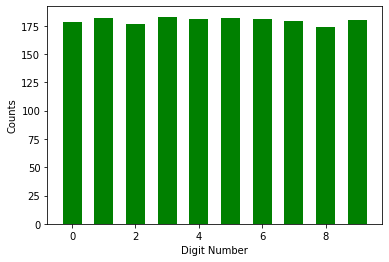

In [15]:
plt.bar(list(distribution_train.keys()),distribution_train.values(),width =0.6, color="g")
plt.xlabel('Digit Number') #bar graph for checking the distribution 
plt.ylabel('Counts')
plt.show()

# d) Binary Classifier
## Using "5" or "not 5" 

In [16]:
y5_train = (y_train == 5)
y5_train[5]

True

In [17]:
y5_test = (y_test == 5)

In [18]:
y5_train

array([False, False, False, ..., False, False,  True])

{False: 1453, True: 165}


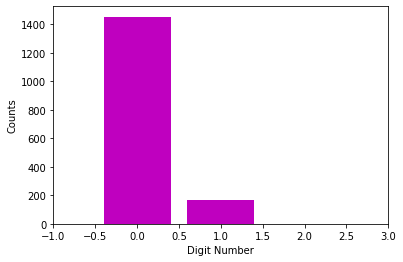

In [19]:
digit_train, counts_train = np.unique(y5_train, return_counts = True)

distribution_train = dict(zip(digit_train, counts_train)) #to check the numbler of datapoints for each digit in y train
print(distribution_train )

plt.bar(list(distribution_train.keys()),distribution_train.values(), color="m")
plt.xlim(-1,3)
plt.xlabel('Digit Number') #bar graph for checking the distribution 
plt.ylabel('Counts')
plt.show()

# Logistic Regression 
## *5 OR not* 

In [20]:
from sklearn.linear_model import LogisticRegression
logis_regr = LogisticRegression(solver="newton-cg")

In [21]:
logis_regr.fit(X_train, y5_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
print('classes: ',logis_regr.classes_)
print('coefficients: ',logis_regr.coef_)
print('intercept :', logis_regr.intercept_)

classes:  [False  True]
coefficients:  [[ 0.00000000e+00  1.10451715e-01  5.88846357e-01 -3.19572600e-01
   8.71415300e-02  4.77542035e-01  6.04604412e-01 -2.22872479e-01
   1.71069952e-03 -1.22690861e-02  1.79292252e-01  3.41252085e-01
   5.21700879e-02 -9.45168335e-02 -1.94464058e-01 -1.23625347e-01
  -1.91241100e-03 -3.35235399e-01  3.10464849e-01  1.62601146e-01
  -5.64325546e-01 -6.90397452e-01 -9.12930274e-01 -7.61280449e-03
  -3.14165463e-03  2.29224247e-01  5.31990737e-01 -1.26443085e-01
   4.04486227e-01 -1.42802035e-01 -8.80514698e-01 -1.22264448e-09
   0.00000000e+00 -4.92114712e-01  4.09177080e-02 -3.62754921e-02
  -4.68753658e-01 -1.24394912e-01  2.37117915e-01  0.00000000e+00
  -2.47991527e-08 -2.34332307e-01 -3.60341858e-01 -4.00966289e-01
  -2.52590785e-02  2.03820192e-01  3.54339363e-02 -1.42619858e-02
  -1.11677672e-09 -3.11291061e-02 -3.00159722e-01  1.16002486e-01
   2.07677658e-02 -3.68718530e-02 -3.72557709e-01 -9.61126942e-03
  -9.95020687e-11  1.54681888e-02  3.

In [23]:
y5_pred = logis_regr.predict(X_train)

In [24]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y5_train, y5_pred))

[[1453    0]
 [   0  165]]


In [25]:
y5_pred = logis_regr.predict(X_test)

In [26]:
print(confusion_matrix(y5_test, y5_pred))

[[160   2]
 [  0  17]]


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision score is: ", precision_score(y5_test, y5_pred))
print("Recall score is: ", recall_score(y5_test, y5_pred))
print("F1 score is: ", f1_score(y5_test, y5_pred))

Precision score is:  0.8947368421052632
Recall score is:  1.0
F1 score is:  0.9444444444444444


# KNN
## *5 OR not*

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [29]:
knn_clf.fit(X_train, y5_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
knn_clf.kneighbors_graph()

<1618x1618 sparse matrix of type '<class 'numpy.float64'>'
	with 8090 stored elements in Compressed Sparse Row format>

In [31]:
y5_pred = knn_clf.predict(X_train)

In [32]:
print(confusion_matrix(y5_train, y5_pred))

[[1452    1]
 [   2  163]]


In [33]:
y5_pred = knn_clf.predict(X_test)
print(confusion_matrix(y5_test, y5_pred))

[[160   2]
 [  0  17]]


In [34]:
print("Precision score is: ", precision_score(y5_test, y5_pred))
print("Recall score is: ", recall_score(y5_test, y5_pred))
print("F1 score is: ", f1_score(y5_test, y5_pred))

Precision score is:  0.8947368421052632
Recall score is:  1.0
F1 score is:  0.9444444444444444


# LDA
##*5 OR not*

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver='svd')

In [36]:
lda.fit(X_train, y5_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [37]:
y5_pred = lda.predict(X_train)

In [38]:
print(confusion_matrix(y5_train, y5_pred))

[[1452    1]
 [   9  156]]


In [39]:
y5_pred = lda.predict(X_test)
print(confusion_matrix(y5_test, y5_pred))

[[162   0]
 [  0  17]]


In [40]:
print("Precision score is: ", precision_score(y5_test, y5_pred))
print("Recall score is: ", recall_score(y5_test, y5_pred))
print("F1 score is: ", f1_score(y5_test, y5_pred))

Precision score is:  1.0
Recall score is:  1.0
F1 score is:  1.0


# QDA
##*5 OR not*

In [41]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()

In [42]:
qda.fit(X_train, y5_train)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [43]:
y5_pred = qda.predict(X_train)

In [44]:
print(confusion_matrix(y5_train, y5_pred))

[[1332  121]
 [  68   97]]


In [45]:
y5_pred = qda.predict(X_test)
print(confusion_matrix(y5_test, y5_pred))

[[147  15]
 [ 11   6]]


In [46]:
print("Precision score is: ", precision_score(y5_test, y5_pred))
print("Recall score is: ", recall_score(y5_test, y5_pred))
print("F1 score is: ", f1_score(y5_test, y5_pred))

Precision score is:  0.2857142857142857
Recall score is:  0.35294117647058826
F1 score is:  0.31578947368421056


# e) Compare the performance of 4 classifiers

From above code, we can note that Logistic regression performed better on training set than on the test set. Similar was the case for the KNN model. LDA performed best when we predicted using the test dataset. Its precision, recall and F1 scores were 1.0. However, for our dataset QDA performed worst both on training as well as test dataset. 

# f) All classes

In [47]:
X = hand_digits["data"]
y = hand_digits["target"]

In [48]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [49]:
X_train, X_test, y_train, y_test = X[:1620], X[1620:], y[:1620], y[1620:]

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1620, 64)
(177, 64)
(1620,)
(177,)


# Logistic Regression


In [51]:
m_logis = LogisticRegression()

In [52]:
m_logis.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
y_pred = m_logis.predict(X_train)

In [54]:
print(confusion_matrix(y_train, y_pred))

[[162   0   0   0   0   0   0   0   0   0]
 [  0 163   0   0   0   0   0   0   0   0]
 [  0   0 161   0   0   0   0   0   0   0]
 [  0   0   0 165   0   0   0   0   0   0]
 [  0   0   0   0 161   0   0   0   0   0]
 [  0   0   0   0   0 165   0   0   0   0]
 [  0   0   0   0   0   0 163   0   0   0]
 [  0   0   0   0   0   0   0 160   0   0]
 [  0   0   0   0   0   0   0   0 158   0]
 [  0   0   0   0   0   0   0   0   0 162]]


In [55]:
y_pred = m_logis.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  2  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  2  0  0  6  0]
 [ 0  0  0  0 18  0  0  0  0  2]
 [ 0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0 19  0  0]
 [ 0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0  1 17]]


In [56]:
from sklearn.metrics import plot_confusion_matrix

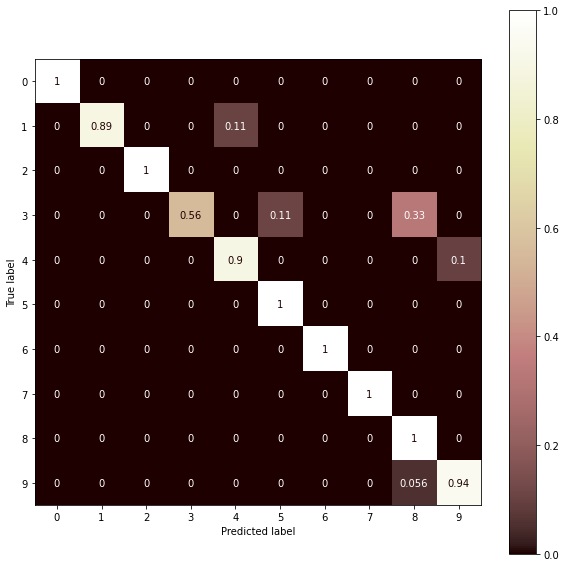

In [57]:
class_names = hand_digits["target_names"]
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(m_logis, X_test, y_test, labels=class_names, cmap= plt.cm.pink, normalize="true", ax=ax)
plt.show()

# Logistic Regression + OVR (One Versus Rest)

In [58]:
from sklearn.multiclass import OneVsRestClassifier
ovr = OneVsRestClassifier(LogisticRegression())

In [59]:
ovr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [60]:
y_pred = ovr.predict(X_train)

In [61]:
print(confusion_matrix(y_train, y_pred))

[[162   0   0   0   0   0   0   0   0   0]
 [  0 159   0   0   0   0   0   0   4   0]
 [  0   0 161   0   0   0   0   0   0   0]
 [  0   0   0 165   0   0   0   0   0   0]
 [  0   0   0   0 161   0   0   0   0   0]
 [  0   0   0   0   0 165   0   0   0   0]
 [  0   0   0   0   0   0 163   0   0   0]
 [  0   0   0   0   0   0   0 160   0   0]
 [  0   3   0   1   0   0   0   0 154   0]
 [  0   0   0   0   0   0   0   0   0 162]]


In [62]:
y_pred = ovr.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  2  0]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  3  0  0  3  0]
 [ 0  0  0  0 18  0  0  0  0  2]
 [ 0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0 19  0  0]
 [ 0  0  0  0  1  0  0  0 15  0]
 [ 0  0  0  1  0  0  0  0  0 17]]


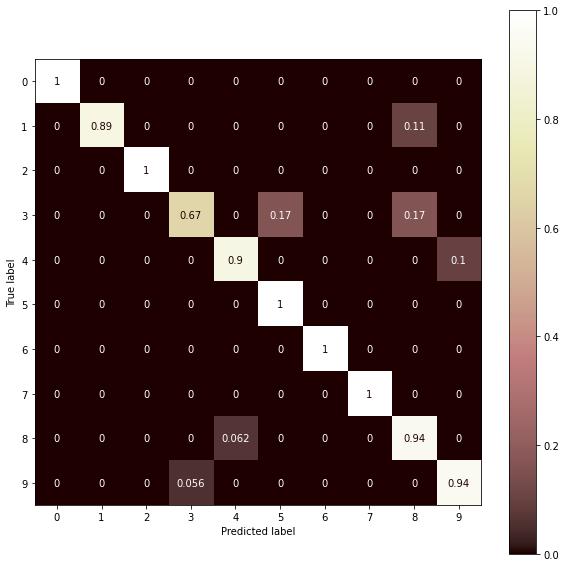

In [63]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(ovr, X_test, y_test, labels=class_names, cmap= plt.cm.pink, normalize="true", ax=ax)
plt.show()

# KNN

In [64]:
m_knn = KNeighborsClassifier()

In [65]:
m_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [66]:
y_pred = m_knn.predict(X_train)

In [67]:
print(confusion_matrix(y_train, y_pred))

[[162   0   0   0   0   0   0   0   0   0]
 [  0 163   0   0   0   0   0   0   0   0]
 [  0   0 161   0   0   0   0   0   0   0]
 [  0   0   0 163   0   0   0   2   0   0]
 [  0   0   0   0 160   0   0   1   0   0]
 [  0   0   0   0   0 163   1   0   0   1]
 [  0   0   0   0   0   0 163   0   0   0]
 [  0   0   0   0   0   0   0 159   0   1]
 [  0   3   0   1   0   0   0   0 154   0]
 [  0   1   0   2   0   1   0   1   1 156]]


In [68]:
y_pred = m_knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  1 16  0  1  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  1  0]
 [ 0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0 19  0  0]
 [ 0  1  0  0  0  0  0  0 15  0]
 [ 0  0  0  1  0  1  0  0  0 16]]


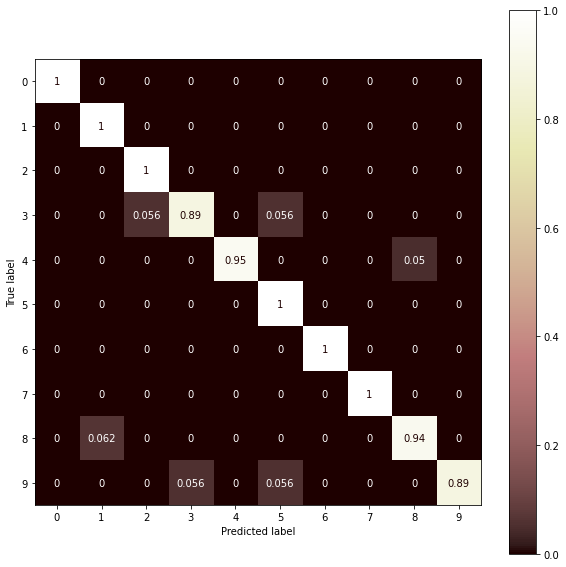

In [69]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(m_knn, X_test, y_test, labels=class_names, cmap= plt.cm.pink, normalize="true", ax=ax)
plt.show()

# LDA

In [70]:
m_lda = LinearDiscriminantAnalysis()

In [71]:
m_lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [72]:
y_pred = m_lda.predict(X_train)

In [73]:
print(confusion_matrix(y_train,y_pred))

[[161   0   0   0   0   0   1   0   0   0]
 [  0 157   0   0   0   0   0   0   2   4]
 [  0   0 160   1   0   0   0   0   0   0]
 [  0   0   0 157   0   1   0   0   6   1]
 [  0   0   0   0 158   0   0   1   1   1]
 [  0   0   0   1   0 158   1   0   0   5]
 [  0   2   0   0   1   0 160   0   0   0]
 [  0   0   0   0   0   0   0 156   0   4]
 [  0   7   0   0   0   1   0   1 147   2]
 [  0   0   0   1   0   2   0   2   3 154]]


In [74]:
y_pred = m_lda.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  3  0]
 [ 0  0 15  1  0  0  0  0  0  0]
 [ 0  0  1 13  0  2  0  0  2  0]
 [ 0  1  0  0 17  0  0  1  1  0]
 [ 0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0 19  0  0]
 [ 0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  1  0  1  0  0  1 15]]


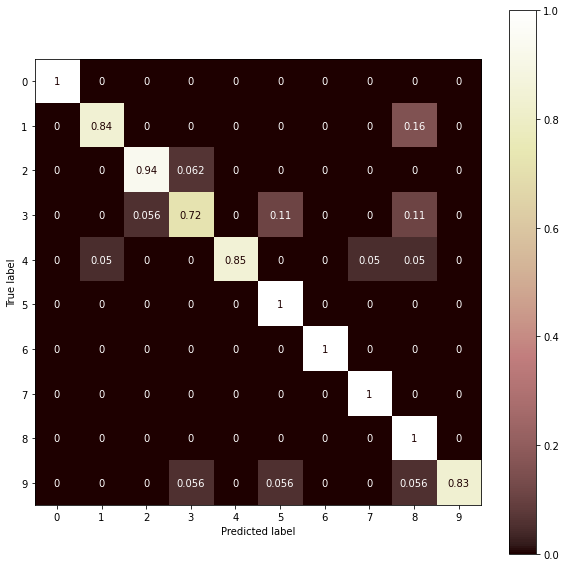

In [75]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(m_lda, X_test, y_test, labels=class_names, cmap= plt.cm.pink, normalize="true", ax=ax)
plt.show()

# QDA

In [76]:
m_qda = QuadraticDiscriminantAnalysis()

In [77]:
m_qda.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [78]:
y_pred = m_qda.predict(X_train)

In [79]:
print(confusion_matrix(y_train,y_pred))

[[162   0   0   0   0   0   0   0   0   0]
 [  0 161   0   0   1   0   0   0   1   0]
 [  0   2 158   0   0   0   0   0   1   0]
 [  0   0   0 162   0   0   0   0   3   0]
 [  0   0   0   0 158   0   1   2   0   0]
 [  0   6   0  18   0  76   2   2  25  36]
 [  0   0   0   0   0   0 163   0   0   0]
 [  0   0   0   0   1   0   0 159   0   0]
 [  0   4   0   0   1   0   0   0 153   0]
 [  0   3   0   1   0   1   0   6   6 145]]


In [80]:
y_pred = m_qda.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  1  0]
 [ 0  0 15  0  0  0  0  0  1  0]
 [ 0  0  0 13  0  0  1  0  3  1]
 [ 0  0  0  0 19  0  0  0  1  0]
 [ 0  2  0  0  0  4  2  0  3  6]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  1  1  0  0 17  0  0]
 [ 0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  2  2 14]]


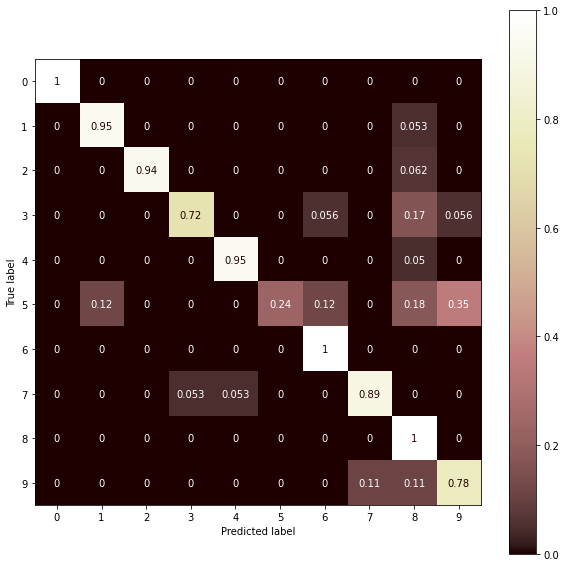

In [81]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(m_qda, X_test, y_test, labels=class_names, cmap= plt.cm.pink, normalize="true", ax=ax)
plt.show()

For multiclass classification, Logistic regression performed the best for our example. QDA performed worst from all.